In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import preprocessing
import time
%matplotlib inline

In [2]:
industry_df = pd.read_csv('Data/movie_industry.csv', encoding='latin-1')
oscar_df = pd.read_csv('Data/the_oscar_award.csv', encoding='latin-1')
links_df = pd.read_csv('Data/movie_lense/links.csv')
tags_df = pd.read_csv('Data/movie_lense/tags.csv')
genome_scores_df = pd.read_csv('Data/movie_lense/genome-scores.csv')
movies_df = pd.read_csv('Data/movie_lense/movies.csv')
ratings_df = pd.read_csv('Data/movie_lense/ratings.csv')
genome_tags_df = pd.read_csv('Data/movie_lense/genome-tags.csv')

In [5]:
tgsdf = genome_scores_df.pivot(index='movieId',columns='tagId',values='relevance')
genome_tags_dict = dict(zip(genome_tags_df['tagId'],genome_tags_df['tag']))
movie_tags_df = tgsdf.rename(genome_tags_dict,axis='columns')
movie_tags_df 

tagId,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,19th century,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.02900,0.02375,0.05425,0.06875,0.16000,0.19525,0.07600,0.25200,0.22750,0.02400,...,0.03775,0.02250,0.04075,0.03175,0.12950,0.04550,0.02000,0.03850,0.09125,0.02225
2,0.03625,0.03625,0.08275,0.08175,0.10200,0.06900,0.05775,0.10100,0.08225,0.05250,...,0.04775,0.02050,0.01650,0.02450,0.13050,0.02700,0.01825,0.01225,0.09925,0.01850
3,0.04150,0.04950,0.03000,0.09525,0.04525,0.05925,0.04000,0.14150,0.04075,0.03200,...,0.05800,0.02375,0.03550,0.02125,0.12775,0.03250,0.01625,0.02125,0.09525,0.01750
4,0.03350,0.03675,0.04275,0.02625,0.05250,0.03025,0.02425,0.07475,0.03750,0.02400,...,0.04900,0.03275,0.02125,0.03675,0.15925,0.05225,0.01500,0.01600,0.09175,0.01500
5,0.04050,0.05175,0.03600,0.04625,0.05500,0.08000,0.02150,0.07375,0.02825,0.02375,...,0.05375,0.02625,0.02050,0.02125,0.17725,0.02050,0.01500,0.01550,0.08875,0.01575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185435,0.10625,0.10775,0.03025,0.05650,0.23175,0.04575,0.05175,0.44700,0.19875,0.04025,...,0.34725,0.03125,0.03500,0.12125,0.32200,0.08200,0.03325,0.02425,0.13725,0.02625
185585,0.04250,0.04175,0.06475,0.07625,0.08500,0.03800,0.03425,0.16850,0.02525,0.03525,...,0.04325,0.05850,0.03050,0.02750,0.21850,0.04525,0.03550,0.02550,0.17475,0.03100
186587,0.08950,0.09125,0.05075,0.04900,0.19475,0.04500,0.03125,0.17275,0.07850,0.02475,...,0.06475,0.04500,0.04000,0.01975,0.22075,0.15125,0.06150,0.04300,0.20800,0.03925


In [20]:
genome_tags_dict

{1: &#39;007&#39;,
 2: &#39;007 (series)&#39;,
 3: &#39;18th century&#39;,
 4: &#39;1920s&#39;,
 5: &#39;1930s&#39;,
 6: &#39;1950s&#39;,
 7: &#39;1960s&#39;,
 8: &#39;1970s&#39;,
 9: &#39;1980s&#39;,
 10: &#39;19th century&#39;,
 11: &#39;3d&#39;,
 12: &#39;70mm&#39;,
 13: &#39;80s&#39;,
 14: &#39;9/11&#39;,
 15: &#39;aardman&#39;,
 16: &#39;aardman studios&#39;,
 17: &#39;abortion&#39;,
 18: &#39;absurd&#39;,
 19: &#39;action&#39;,
 20: &#39;action packed&#39;,
 21: &#39;adaptation&#39;,
 22: &#39;adapted from:book&#39;,
 23: &#39;adapted from:comic&#39;,
 24: &#39;adapted from:game&#39;,
 25: &#39;addiction&#39;,
 26: &#39;adolescence&#39;,
 27: &#39;adoption&#39;,
 28: &#39;adultery&#39;,
 29: &#39;adventure&#39;,
 30: &#39;affectionate&#39;,
 31: &#39;afi 100&#39;,
 32: &#39;afi 100 (laughs)&#39;,
 33: &#39;afi 100 (movie quotes)&#39;,
 34: &#39;africa&#39;,
 35: &#39;afterlife&#39;,
 36: &#39;aging&#39;,
 37: &#39;aids&#39;,
 38: &#39;airplane&#39;,
 39: &#39;airport&#39;,
 40: &

In [35]:
def extract_user_movies(userID,thresh=4):
    tdf = ratings_df[ratings_df['userId']==userID]
    tdf = tdf[tdf['rating']>=thresh]
    return tdf['movieId'].values

def get_mean_user_tag_relevance(userID,thresh=4,tag_thresh=0,norm=True):
    movies = extract_user_movies(userID,thresh=thresh)
    tdf = movie_tags_df[movie_tags_df.index.isin(movies)]
    # print("# of movies above thresh: {}".format(len(tdf)))
    # Threshold to only include relevant tags
    tdf[tdf<tag_thresh] = 0
    tag_totals = tdf.mean(axis=0)
    if norm:
        return (tag_totals - tag_totals.min())/(tag_totals.max() - tag_totals.min())
    else:
        return tag_mean

def get_user_normalized_tag_density(userID,thresh=4,tag_thresh=0):
    movies = extract_user_movies(userID,thresh=thresh)
    tdf = movie_tags_df[movie_tags_df.index.isin(movies)]
    # print("# of movies above thresh: {}".format(len(tdf)))
    # Threshold to only include relevant tags
    tdf[tdf<tag_thresh] = 0
    # tag_totals = tdf.sum(axis=0)
    # overall_totals = movie_tags_df.sum(axis=0)
    tag_totals = tdf.mean(axis=0)
    overall_totals = movie_tags_df.mean(axis=0)
    relative_totals = tag_totals/overall_totals
    # print(relative_totals)
    tag_totals = relative_totals
    # print(tag_totals)
    return (tag_totals - tag_totals.min())/(tag_totals.max() - tag_totals.min())

get_mean_user_tag_relevance(5)


tagId
007             0.061358
007 (series)    0.044020
18th century    0.064624
1920s           0.087948
1930s           0.178037
                  ...   
writing         0.209226
wuxia           0.041424
wwii            0.117768
zombie          0.118126
zombies         0.028313
Length: 1128, dtype: float64

In [36]:
# Run K - means clustering on the users themselves? See how the clusters change over time given recommendation system?
# Build matrix where every row is a user and their tag relevance
Nusers = 1000
seed = 1
userIDs = ratings_df.sample(Nusers,random_state=seed)['userId'].values
userIDs
M = [get_mean_user_tag_relevance(user).values for user in userIDs]

In [37]:
M_df = pd.DataFrame(np.array(M))
M_df = M_df.rename(columns=genome_tags_df['tag'])
M_df['userId'] = userIDs
M_df.set_index('userId', drop=True, inplace=True)
M_df

,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,19th century,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
userId,,,,,,,,,,,,,,,,,,,,,
99948,0.043823,0.034528,0.087405,0.086885,0.158478,0.162250,0.082568,0.244691,0.211751,0.069922,...,0.129659,0.043380,0.070246,0.061422,0.239416,0.130406,0.055965,0.060893,0.117143,0.024688
151227,0.048870,0.030209,0.095618,0.096896,0.228965,0.206183,0.078371,0.244104,0.148772,0.093890,...,0.144120,0.062512,0.081255,0.098447,0.306983,0.189766,0.139292,0.078221,0.106417,0.021490
22361,0.089271,0.067367,0.100526,0.099681,0.158966,0.171336,0.092430,0.255376,0.220237,0.076596,...,0.177146,0.072824,0.106315,0.062563,0.277340,0.139642,0.042167,0.097137,0.121381,0.024799
36147,0.031637,0.031768,0.112982,0.112297,0.179537,0.183899,0.108811,0.297728,0.196001,0.084570,...,0.182905,0.048720,0.053667,0.119046,0.336320,0.174709,0.047188,0.041667,0.119486,0.027554
143305,0.035954,0.035197,0.091085,0.118487,0.203165,0.238033,0.117569,0.361945,0.257098,0.075568,...,0.159145,0.063889,0.084924,0.107248,0.252881,0.166124,0.062782,0.072548,0.143592,0.041354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234076,0.049667,0.032560,0.100170,0.081361,0.126802,0.101340,0.071489,0.238505,0.131517,0.085735,...,0.160658,0.057216,0.088603,0.073904,0.297545,0.179416,0.066097,0.081794,0.146270,0.041353
219883,0.075633,0.069505,0.147184,0.122343,0.166627,0.150598,0.075264,0.244615,0.169521,0.093738,...,0.159461,0.078797,0.123989,0.070064,0.232918,0.124838,0.045252,0.111643,0.175230,0.077969
138921,0.063526,0.053856,0.255406,0.154902,0.273232,0.230594,0.131523,0.237583,0.133992,0.220724,...,0.157031,0.080685,0.156590,0.084538,0.289846,0.116064,0.036176,0.126493,0.129910,0.026362


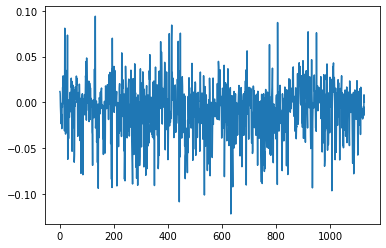

Explained variation per principal component: [0.35290563 0.18248739 0.09966456 0.05876839 0.04923691 0.03969165
 0.02208094 0.01779886 0.01697807 0.01163094]


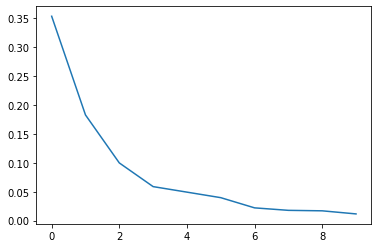

In [46]:
pca = PCA(n_components = 10)
pca_results = pca.fit_transform(M_df)
pca_results.shape
pca.components_.shape
plt.plot(np.arange(len(pca.components_[0,:])),pca.components_[0,:])
plt.show()
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
plt.plot(np.arange(0,len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
plt.yscale('linear')
plt.show()

In [47]:
M_PCA_df = pd.DataFrame(data =pca_results, index = M_df.index)
M_PCA_df

,0,1,2,3,4,5,6,7,8,9
userId,,,,,,,,,,
99948,0.941938,0.875966,0.211865,0.867279,0.390835,-0.069635,0.282684,-0.047711,0.417738,-0.458876
151227,-1.551739,0.355639,-0.039075,-0.544117,-0.014971,-0.248098,-0.268776,0.074223,0.168008,0.214333
22361,0.660697,0.364668,0.171062,-0.455625,-0.186999,0.247148,0.126213,0.467593,0.100442,0.074735
36147,-1.042587,-0.892877,-0.290230,-0.049084,0.378207,0.003303,0.143894,0.153433,-0.028836,0.022214
143305,-2.074408,0.629372,-0.736137,-0.504636,-0.916187,0.071098,-0.094387,-0.385772,0.537788,0.236010
...,...,...,...,...,...,...,...,...,...,...
234076,0.044330,0.481000,-0.537833,-0.298691,0.518851,-0.511036,0.018465,0.183965,-0.134002,-0.128972
219883,-0.117305,0.718643,0.203663,0.717019,0.247743,-0.621359,-0.445730,-0.272637,-0.192707,0.005775
138921,0.483836,-0.916663,0.722263,0.173033,0.372095,0.419455,-0.519293,0.128318,-0.332467,0.373176


In [48]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1200)
# tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1200)
# tsne_df = small_movie_PCA_df
tsne_df = M_PCA_df
tsne_results = tsne.fit_transform(tsne_df)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.069s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.561935
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.611088
[t-SNE] KL divergence after 1200 iterations: 1.101581


&lt;matplotlib.collections.PathCollection at 0x218c318fe50&gt;

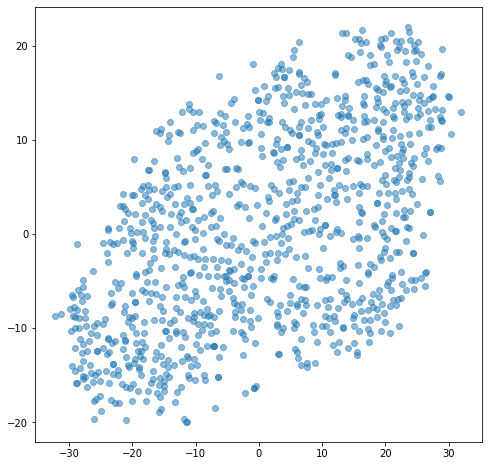

In [49]:
plt.figure(figsize=(8,8))
N = len(tsne_results)
plt.scatter(tsne_results[:,0], tsne_results[:,1],alpha=0.5, edgecolors=None)